# Experiement: Round Three | 4%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/cardio_4.csv")

df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  38909  20453       1     170    75.0    120     80            1     1   
1  70332  21250       1     162    74.0    130     70            1     1   
2   6734  22359       2     164    77.0    140     90            1     1   
3  19705  19165       1     163    72.0    140     70            1     1   
4  72468  21624       2     164    60.0    120     80            1     1   

   smoke  alco  active  cardio  
0      0     0       1       1  
1      0     0       1       1  
2      0     0       1       1  
3      0     0       1       1  
4      0     0       1       1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36279 entries, 0 to 36278
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           36279 non-null  int64  
 1   age          36279 non-null  int64  
 2   gender       36279 non-null  int64  
 3   height       36279 non-null  int64  
 4   weight       36279 non-null  float64
 5   ap_hi        36279 non-null  int64  
 6   ap_lo        36279 non-null  int64  
 7   cholesterol  36279 non-null  int64  
 8   gluc         36279 non-null  int64  
 9   smoke        36279 non-null  int64  
 10  alco         36279 non-null  int64  
 11  active       36279 non-null  int64  
 12  cardio       36279 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 3.6 MB


0    34679
1     1600
Name: cardio, dtype: int64

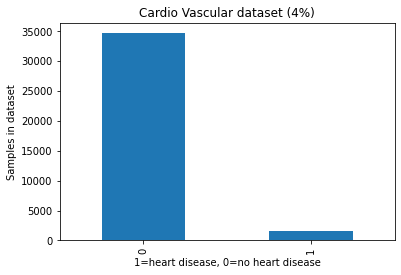

In [3]:
pd.value_counts(df['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (4%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df['cardio'].value_counts()

Balance ratio: 34622/69301 = 0,0441026

# Train/Test split

The random_state is 42.

In [4]:
# Importing the splitter, classification model, and the metric
from sklearn.model_selection import train_test_split
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['cardio']), df['cardio'], test_size = 0.2, stratify = df['cardio'], random_state = 42)

In [5]:
X_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
5342   11686  19932       1     165    55.0    120     80            1     1   
15125  39395  15278       1     165    60.0    100     60            1     1   
27266  73997  21198       1     168    65.0    120     80            1     1   
31127  85086  18057       1     150    60.0    120     80            1     1   
26776  72647  19655       1     159    71.0    100     70            1     1   

       smoke  alco  active  
5342       0     0       1  
15125      0     0       0  
27266      0     0       1  
31127      0     0       0  
26776      0     0       1

# Logistic Regression with raw dataset

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27743
           1       0.14      0.00      0.00      1280

    accuracy                           0.96     29023
   macro avg       0.55      0.50      0.49     29023
weighted avg       0.92      0.96      0.93     29023



In [7]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6936
           1       0.00      0.00      0.00       320

    accuracy                           0.96      7256
   macro avg       0.48      0.50      0.49      7256
weighted avg       0.91      0.96      0.93      7256



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.656


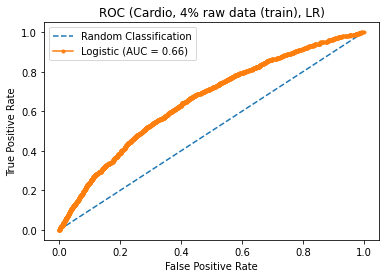

In [8]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4% raw data (train), LR)')
# show the legend
pyplot.legend()
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.654


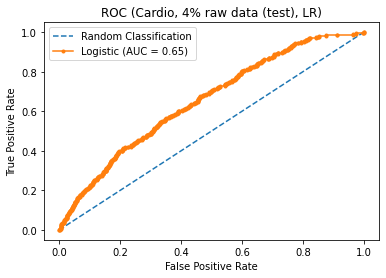

In [9]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4% raw data (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with raw dataset

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27743
           1       1.00      0.00      0.00      1280

    accuracy                           0.96     29023
   macro avg       0.98      0.50      0.49     29023
weighted avg       0.96      0.96      0.93     29023



In [11]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6936
           1       0.00      0.00      0.00       320

    accuracy                           0.96      7256
   macro avg       0.48      0.50      0.49      7256
weighted avg       0.91      0.96      0.93      7256



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.781


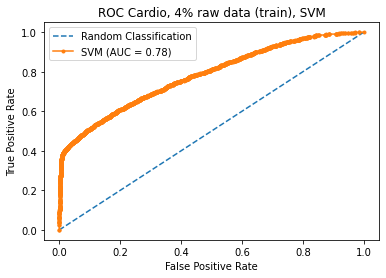

In [12]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 4% raw data (train), SVM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.576


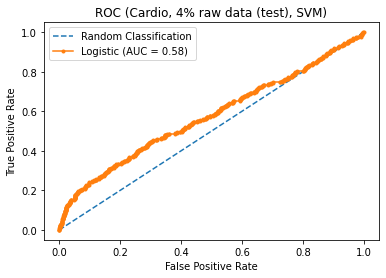

In [13]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4% raw data (test), SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with raw dataset

In [14]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [15]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.04396	validation_0-logloss:0.61306	validation_1-error:0.04410	validation_1-logloss:0.61319
[1]	validation_0-error:0.04400	validation_0-logloss:0.54746	validation_1-error:0.04410	validation_1-logloss:0.54782
[2]	validation_0-error:0.04410	validation_0-logloss:0.49296	validation_1-error:0.04396	validation_1-logloss:0.49339
[3]	validation_0-error:0.04410	validation_0-logloss:0.44711	validation_1-error:0.04410	validation_1-logloss:0.44771
[4]	validation_0-error:0.04407	validation_0-logloss:0.40816	validation_1-error:0.04410	validation_1-logloss:0.40890
[5]	validation_0-error:0.04407	validation_0-logloss:0.37482	validation_1-error:0.04410	validation_1-logloss:0.37558
[6]	validation_0-error:0.04407	validation_0-logloss:0.34609	validation_1-error:0.04410	validation_1-logloss:0.34706
[7]	validation_0-error:0.04407	validation_0-logloss:0.32128	validation_1-error:0.04410	validation_1-logloss:0.32240
[8]	validation_0-error:0.04407	validation_0-logloss:0.29978	validation_1

[71]	validation_0-error:0.04410	validation_0-logloss:0.14445	validation_1-error:0.04410	validation_1-logloss:0.15436
CPU times: user 3.1 s, sys: 96.1 ms, total: 3.19 s
Wall time: 3.32 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27743
           1       0.00      0.00      0.00      1280

    accuracy                           0.96     29023
   macro avg       0.48      0.50      0.49     29023
weighted avg       0.91      0.96      0.93     29023



In [17]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6936
           1       0.00      0.00      0.00       320

    accuracy                           0.96      7256
   macro avg       0.48      0.50      0.49      7256
weighted avg       0.91      0.96      0.93      7256



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.829


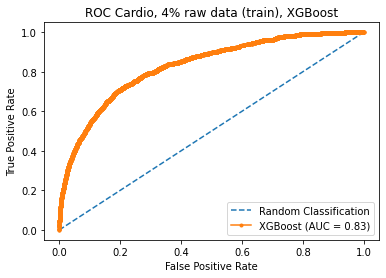

In [18]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 4% raw data (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.798


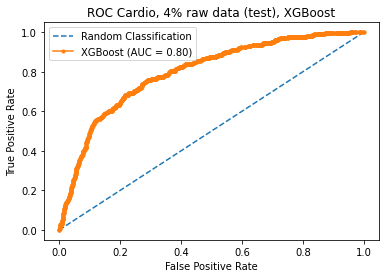

In [19]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 4% raw data (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Data augmentation

In the following part, the data gets perfectly balanced, by applying SMOTE, TVAE, and CTGAN to the raw dataset. The minority class is oversampled, by only creating samples with cardio=1. Afterwards, the machine learning algorithms run with the balaned datasets.

In [20]:
df_train = X_train
df_train['cardio'] = y_train

In [21]:
df_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
5342   11686  19932       1     165    55.0    120     80            1     1   
15125  39395  15278       1     165    60.0    100     60            1     1   
27266  73997  21198       1     168    65.0    120     80            1     1   
31127  85086  18057       1     150    60.0    120     80            1     1   
26776  72647  19655       1     159    71.0    100     70            1     1   

       smoke  alco  active  cardio  
5342       0     0       1       0  
15125      0     0       0       0  
27266      0     0       1       0  
31127      0     0       0       0  
26776      0     0       1       0


### SMOTE

1    27743
0    27743
Name: cardio, dtype: int64

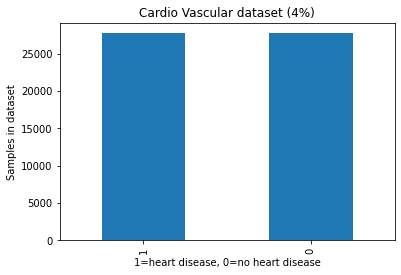

In [22]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df_train[['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']], df_train['cardio'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
df_oversampler_y = pd.DataFrame(y, columns = ['cardio'])
pd.value_counts(df_oversampler_y['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (4%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df_oversampler_y['cardio'].value_counts()

In [23]:
X_train = df_oversampler
y_train = df_oversampler_y

## Logistic Regression with data from SMOTE

In [24]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73     27743
           1       0.73      0.69      0.71     27743

    accuracy                           0.72     55486
   macro avg       0.72      0.72      0.72     55486
weighted avg       0.72      0.72      0.72     55486



In [25]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      6936
           1       0.10      0.67      0.18       320

    accuracy                           0.73      7256
   macro avg       0.54      0.70      0.51      7256
weighted avg       0.94      0.73      0.81      7256



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.784


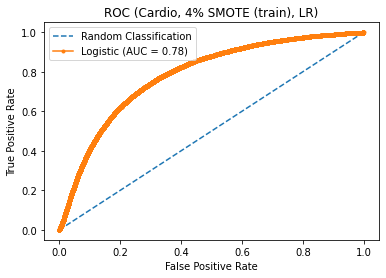

In [26]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4% SMOTE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.764


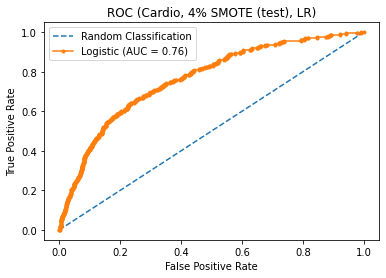

In [27]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4% SMOTE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with data from SMOTE

In [28]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     27743
           1       0.79      0.81      0.80     27743

    accuracy                           0.79     55486
   macro avg       0.79      0.79      0.79     55486
weighted avg       0.79      0.79      0.79     55486



In [29]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      6936
           1       0.09      0.47      0.15       320

    accuracy                           0.76      7256
   macro avg       0.53      0.62      0.50      7256
weighted avg       0.93      0.76      0.83      7256



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.873


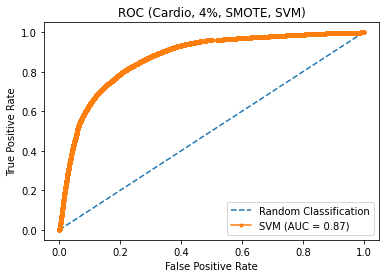

In [30]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4%, SMOTE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.694


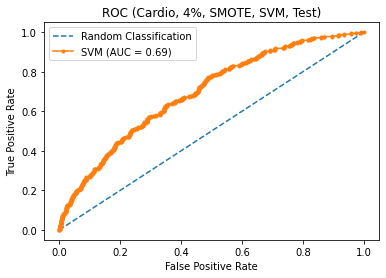

In [31]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4%, SMOTE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## XGBoost with data from SMOTE

In [32]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.18877	validation_0-logloss:0.65061	validation_1-error:0.23167	validation_1-logloss:0.65270
[1]	validation_0-error:0.18455	validation_0-logloss:0.61611	validation_1-error:0.16731	validation_1-logloss:0.61992
[2]	validation_0-error:0.16613	validation_0-logloss:0.58202	validation_1-error:0.17516	validation_1-logloss:0.58747
[3]	validation_0-error:0.16907	validation_0-logloss:0.55856	validation_1-error:0.17930	validation_1-logloss:0.56564
[4]	validation_0-error:0.16588	validation_0-logloss:0.53274	validation_1-error:0.18095	validation_1-logloss:0.54076
[5]	validation_0-error:0.16437	validation_0-logloss:0.51360	validation_1-error:0.17516	validation_1-logloss:0.52330
[6]	validation_0-error:0.16694	validation_0-logloss:0.49463	validation_1-error:0.17434	validation_1-logloss:0.50452
[7]	validation_0-error:0.16916	validation_0-logloss:0.47872	validation_1-error:0.17544	validation_1-logloss:0.48881
[8]	validation_0-error:0.16323	validation_0-logloss:0.46414	validation_1

[71]	validation_0-error:0.10522	validation_0-logloss:0.26902	validation_1-error:0.10929	validation_1-logloss:0.30302
[72]	validation_0-error:0.10480	validation_0-logloss:0.26788	validation_1-error:0.10943	validation_1-logloss:0.30211
[73]	validation_0-error:0.10476	validation_0-logloss:0.26754	validation_1-error:0.10943	validation_1-logloss:0.30207
[74]	validation_0-error:0.10455	validation_0-logloss:0.26682	validation_1-error:0.10943	validation_1-logloss:0.30175
[75]	validation_0-error:0.10415	validation_0-logloss:0.26590	validation_1-error:0.10763	validation_1-logloss:0.30077
[76]	validation_0-error:0.10341	validation_0-logloss:0.26450	validation_1-error:0.10653	validation_1-logloss:0.29943
[77]	validation_0-error:0.10332	validation_0-logloss:0.26408	validation_1-error:0.10667	validation_1-logloss:0.29920
[78]	validation_0-error:0.10325	validation_0-logloss:0.26376	validation_1-error:0.10708	validation_1-logloss:0.29921
[79]	validation_0-error:0.10276	validation_0-logloss:0.26258	val

[141]	validation_0-error:0.07950	validation_0-logloss:0.21547	validation_1-error:0.09110	validation_1-logloss:0.26679
[142]	validation_0-error:0.07885	validation_0-logloss:0.21439	validation_1-error:0.08972	validation_1-logloss:0.26589
[143]	validation_0-error:0.07849	validation_0-logloss:0.21375	validation_1-error:0.08930	validation_1-logloss:0.26529
[144]	validation_0-error:0.07840	validation_0-logloss:0.21357	validation_1-error:0.08930	validation_1-logloss:0.26513
[145]	validation_0-error:0.07789	validation_0-logloss:0.21225	validation_1-error:0.08917	validation_1-logloss:0.26432
[146]	validation_0-error:0.07775	validation_0-logloss:0.21180	validation_1-error:0.08903	validation_1-logloss:0.26404
[147]	validation_0-error:0.07699	validation_0-logloss:0.21071	validation_1-error:0.08862	validation_1-logloss:0.26347
[148]	validation_0-error:0.07623	validation_0-logloss:0.20958	validation_1-error:0.08807	validation_1-logloss:0.26278
[149]	validation_0-error:0.07535	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     27743
           1       0.96      0.92      0.94     27743

    accuracy                           0.94     55486
   macro avg       0.94      0.94      0.94     55486
weighted avg       0.94      0.94      0.94     55486



In [34]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6936
           1       0.11      0.11      0.11       320

    accuracy                           0.92      7256
   macro avg       0.54      0.53      0.54      7256
weighted avg       0.92      0.92      0.92      7256



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.984


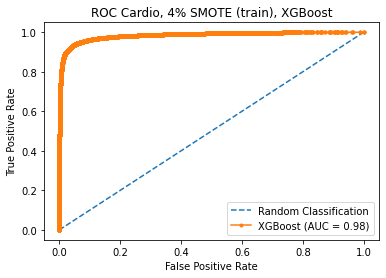

In [35]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 4% SMOTE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.727


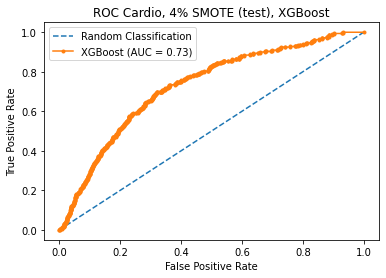

In [36]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 4% SMOTE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Data augmentation with TVAE 

In [37]:
df_train['cardio'].value_counts()

0    27743
1     1280
Name: cardio, dtype: int64

In [38]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(df_train)
# Once trained generate samples
samples = tvae.sample(2000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([df_train,samples])
tvae_result_df['cardio'].value_counts()

0    27743
1     1280
Name: cardio, dtype: int64

In [39]:
tvae_result_df_1 = tvae_result_df[tvae_result_df['cardio'] == 1]
tvae_result_df_1['cardio'].value_counts()

1    1280
Name: cardio, dtype: int64

In [40]:
tvae_result_df_0 = tvae_result_df[tvae_result_df['cardio'] == 0]
train_df_0_sm = tvae_result_df_0.sample(n = 2500)
train_df_sm = train_df_0_sm.append(tvae_result_df_1)
train_df_sm['cardio'].value_counts()

0    2500
1    1280
Name: cardio, dtype: int64

In [41]:
tvae = TVAE()

tvae.fit(train_df_sm)
samples = tvae.sample(1500)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([train_df_sm,samples])
tvae_result_df['cardio'].value_counts()

0    2500
1    1350
Name: cardio, dtype: int64

In [42]:
tvae = TVAE()

tvae.fit(tvae_result_df)
samples = tvae.sample(1500)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm1 = pd.concat([tvae_result_df,samples])
tvae_result_df_sm1['cardio'].value_counts()

0    2500
1    1775
Name: cardio, dtype: int64

In [43]:
tvae = TVAE()

tvae.fit(tvae_result_df_sm1)
samples = tvae.sample(1800)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm2 = pd.concat([tvae_result_df_sm1,samples])
tvae_result_df_sm2['cardio'].value_counts()

0    2500
1    1964
Name: cardio, dtype: int64

In [44]:
tvae = TVAE()

tvae.fit(tvae_result_df_sm2)
samples = tvae.sample(2000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm3 = pd.concat([tvae_result_df_sm2,samples])
tvae_result_df_sm3['cardio'].value_counts()

1    2663
0    2500
Name: cardio, dtype: int64

In [45]:
tvae = TVAE()

tvae.fit(tvae_result_df_sm3)
samples = tvae.sample(4000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm4 = pd.concat([tvae_result_df_sm3,samples])
tvae_result_df_sm4['cardio'].value_counts()

1    4016
0    2500
Name: cardio, dtype: int64

In [46]:
tvae_result_df_sm_1 = tvae_result_df_sm4[tvae_result_df_sm4['cardio'] == 1]
train_df_0_med = tvae_result_df_0.sample(n = 6000)
train_df_med = train_df_0_med.append(tvae_result_df_sm_1)
train_df_med['cardio'].value_counts()

0    6000
1    4016
Name: cardio, dtype: int64

In [47]:
tvae = TVAE()

tvae.fit(train_df_med)
samples = tvae.sample(5000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_med0 = pd.concat([train_df_med,samples])
tvae_result_df_med0['cardio'].value_counts()

0    6000
1    5740
Name: cardio, dtype: int64

In [48]:
tvae = TVAE()

tvae.fit(tvae_result_df_med0)
samples = tvae.sample(7000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_med1 = pd.concat([tvae_result_df_med0,samples])
tvae_result_df_med1['cardio'].value_counts()

1    8765
0    6000
Name: cardio, dtype: int64

In [49]:
tvae = TVAE()

tvae.fit(tvae_result_df_med1)
samples = tvae.sample(9000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_med2 = pd.concat([tvae_result_df_med1,samples])
tvae_result_df_med2['cardio'].value_counts()

1    11142
0     6000
Name: cardio, dtype: int64

In [50]:
tvae_result_df_med = tvae_result_df_med2[tvae_result_df_med2['cardio'] == 1]
train_df_0_med_1 = tvae_result_df_0.sample(n = 10000)
train_df_med_1 = train_df_0_med_1.append(tvae_result_df_med)
train_df_med_1['cardio'].value_counts()

1    11142
0    10000
Name: cardio, dtype: int64

In [51]:
tvae = TVAE()

tvae.fit(train_df_med_1)
samples = tvae.sample(8500)
samples = samples[samples['cardio'] ==1.0]
train_df_med_1_0 = pd.concat([train_df_med_1,samples])
train_df_med_1_0['cardio'].value_counts()

1    14709
0    10000
Name: cardio, dtype: int64

In [52]:
tvae = TVAE()

tvae.fit(train_df_med_1_0)
samples = tvae.sample(9500)
samples = samples[samples['cardio'] ==1.0]
train_df_med_1_1 = pd.concat([train_df_med_1_0,samples])
train_df_med_1_1['cardio'].value_counts()

1    18823
0    10000
Name: cardio, dtype: int64

In [53]:
tvae = TVAE()

tvae.fit(train_df_med_1_1)
samples = tvae.sample(10000)
samples = samples[samples['cardio'] ==1.0]
train_df_med_1_2 = pd.concat([train_df_med_1_1,samples])
train_df_med_1_2['cardio'].value_counts()

1    23111
0    10000
Name: cardio, dtype: int64

In [54]:
tvae_result_df_lg1 = train_df_med_1_2[train_df_med_1_2['cardio'] == 1]
train_df_0_lg = tvae_result_df_0.sample(n = 20000)
train_df_lg = train_df_0_lg.append(tvae_result_df_lg1)
train_df_lg['cardio'].value_counts()

1    23111
0    20000
Name: cardio, dtype: int64

In [55]:
tvae = TVAE()

tvae.fit(train_df_lg)
samples = tvae.sample(18000)
samples = samples[samples['cardio'] ==1.0]
train_df_lg1 = pd.concat([train_df_lg,samples])
train_df_lg1['cardio'].value_counts()

1    30294
0    20000
Name: cardio, dtype: int64

In [56]:
tvae = TVAE()

tvae.fit(train_df_lg1)
samples = tvae.sample(20000)
samples = samples[samples['cardio'] ==1.0]
train_df_lg2 = pd.concat([train_df_lg1,samples])
train_df_lg2['cardio'].value_counts()

1    38086
0    20000
Name: cardio, dtype: int64

In [57]:
tvae.fit(train_df_sm)
samples = tvae.sample(1500)
samples = samples[samples['cardio'] ==1.0]

In [58]:
train_df_lg2 = train_df_lg2.append(samples)
tvae_result_df_0 = df_train[df_train['cardio'] == 0]
tvae_result_df_1 = train_df_lg2[train_df_lg2['cardio'] == 1]

In [59]:
train_df_1_bal = tvae_result_df_1.sample(n = 27743)

In [60]:
train_df_balanced = train_df_1_bal.append(tvae_result_df_0)

1    27743
0    27743
Name: cardio, dtype: int64

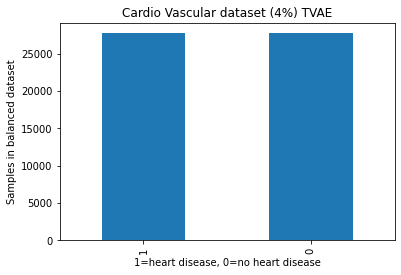

In [61]:
pd.value_counts(train_df_balanced['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (4%) TVAE')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in balanced dataset')
train_df_balanced['cardio'].value_counts()

In [62]:
X_train = train_df_balanced.drop(['cardio'], axis=1)
y_train = train_df_balanced['cardio']

### Logistic Regression with TVAE balanced data

In [63]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82     27743
           1       0.84      0.76      0.80     27743

    accuracy                           0.81     55486
   macro avg       0.81      0.81      0.81     55486
weighted avg       0.81      0.81      0.81     55486



In [64]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      6936
           1       0.07      0.24      0.11       320

    accuracy                           0.82      7256
   macro avg       0.51      0.54      0.50      7256
weighted avg       0.92      0.82      0.87      7256



In [65]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4% TVAE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.880


In [66]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4% TVAE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.538


## SVM with TVAE balanced data

In [67]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27743
           1       0.97      0.92      0.94     27743

    accuracy                           0.95     55486
   macro avg       0.95      0.95      0.95     55486
weighted avg       0.95      0.95      0.95     55486



In [68]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6936
           1       0.11      0.06      0.07       320

    accuracy                           0.94      7256
   macro avg       0.53      0.52      0.52      7256
weighted avg       0.92      0.94      0.93      7256



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.979


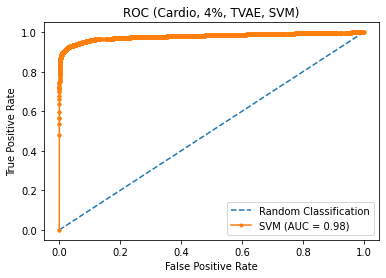

In [69]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4%, TVAE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [70]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4%, TVAE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.573


# XGBoost with TVAE balanced data

In [71]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.08155	validation_0-logloss:0.62256	validation_1-error:0.09868	validation_1-logloss:0.62806
[1]	validation_0-error:0.07031	validation_0-logloss:0.56436	validation_1-error:0.09882	validation_1-logloss:0.57455
[2]	validation_0-error:0.06818	validation_0-logloss:0.51603	validation_1-error:0.10006	validation_1-logloss:0.53032
[3]	validation_0-error:0.05648	validation_0-logloss:0.47437	validation_1-error:0.07415	validation_1-logloss:0.49184
[4]	validation_0-error:0.05652	validation_0-logloss:0.43570	validation_1-error:0.07415	validation_1-logloss:0.45614
[5]	validation_0-error:0.05518	validation_0-logloss:0.40427	validation_1-error:0.07552	validation_1-logloss:0.42762
[6]	validation_0-error:0.04848	validation_0-logloss:0.37727	validation_1-error:0.06436	validation_1-logloss:0.40294
[7]	validation_0-error:0.04816	validation_0-logloss:0.35415	validation_1-error:0.06367	validation_1-logloss:0.38205
[8]	validation_0-error:0.04668	validation_0-logloss:0.33014	validation_1

[71]	validation_0-error:0.02777	validation_0-logloss:0.09642	validation_1-error:0.04989	validation_1-logloss:0.17564
[72]	validation_0-error:0.02768	validation_0-logloss:0.09615	validation_1-error:0.05003	validation_1-logloss:0.17548
[73]	validation_0-error:0.02765	validation_0-logloss:0.09594	validation_1-error:0.04989	validation_1-logloss:0.17542
[74]	validation_0-error:0.02763	validation_0-logloss:0.09541	validation_1-error:0.04961	validation_1-logloss:0.17529
[75]	validation_0-error:0.02750	validation_0-logloss:0.09509	validation_1-error:0.04975	validation_1-logloss:0.17501
[76]	validation_0-error:0.02727	validation_0-logloss:0.09466	validation_1-error:0.05003	validation_1-logloss:0.17492
[77]	validation_0-error:0.02716	validation_0-logloss:0.09445	validation_1-error:0.05003	validation_1-logloss:0.17489
[78]	validation_0-error:0.02712	validation_0-logloss:0.09418	validation_1-error:0.05003	validation_1-logloss:0.17471
[79]	validation_0-error:0.02694	validation_0-logloss:0.09389	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27743
           1       0.99      0.96      0.98     27743

    accuracy                           0.98     55486
   macro avg       0.98      0.98      0.98     55486
weighted avg       0.98      0.98      0.98     55486



In [73]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6936
           1       0.09      0.02      0.03       320

    accuracy                           0.95      7256
   macro avg       0.52      0.50      0.50      7256
weighted avg       0.92      0.95      0.93      7256



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.992


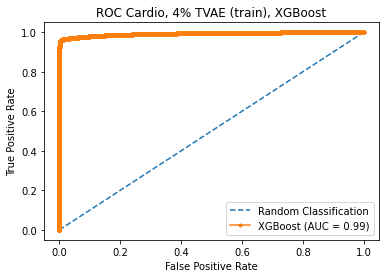

In [74]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 4% TVAE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.758


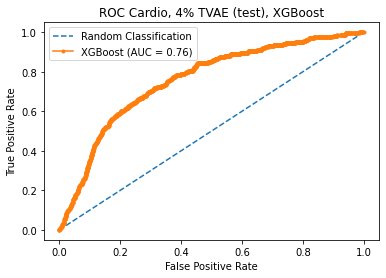

In [75]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 4% TVAE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## CTGAN for balancing the dataset

In [76]:
ctgan_df_1 = df_train[df_train['cardio'] == 1]
ctgan_df_0 = df_train[df_train['cardio'] == 0]
ctgan_0_sm = ctgan_df_0.sample(n = 3000)
train_df_sm = ctgan_0_sm.append(ctgan_df_1)
train_df_sm['cardio'].value_counts()

0    3000
1    1280
Name: cardio, dtype: int64

In [77]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(500)
samples = samples[samples['cardio'] ==1.0]
samples['cardio'].value_counts()

1    173
Name: cardio, dtype: int64

In [78]:
df_train_sm1 = samples.append(train_df_sm)

In [79]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(1000)
samples = samples[samples['cardio'] ==1.0]
df_train_sm2 = df_train_sm1.append(samples)
df_train_sm2['cardio'].value_counts()

0    3000
1    1742
Name: cardio, dtype: int64

In [80]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm2, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(1200)
samples = samples[samples['cardio'] ==1.0]
df_train_sm3 = df_train_sm2.append(samples)
df_train_sm3['cardio'].value_counts()

0    3000
1    2223
Name: cardio, dtype: int64

In [81]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm3, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(1800)
samples = samples[samples['cardio'] ==1.0]
df_train_sm4 = df_train_sm3.append(samples)
df_train_sm4['cardio'].value_counts()

1    3302
0    3000
Name: cardio, dtype: int64

In [82]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm4, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(2500)
samples = samples[samples['cardio'] ==1.0]
df_train_sm5 = df_train_sm4.append(samples)
df_train_sm5['cardio'].value_counts()

1    4782
0    3000
Name: cardio, dtype: int64

In [83]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm5, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(2700)
samples = samples[samples['cardio'] ==1.0]
df_train_sm6 = df_train_sm5.append(samples)
df_train_sm6['cardio'].value_counts()

1    6586
0    3000
Name: cardio, dtype: int64

In [84]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm6, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(3000)
samples = samples[samples['cardio'] ==1.0]
df_train_sm7 = df_train_sm6.append(samples)
df_train_sm7['cardio'].value_counts()

1    8496
0    3000
Name: cardio, dtype: int64

In [85]:
ctgan_df_1_med = df_train_sm7[df_train_sm7['cardio'] == 1]
ctgan_0_med = ctgan_df_0.sample(n = 10000)
train_df_med = ctgan_0_med.append(ctgan_df_1_med)
train_df_med['cardio'].value_counts()

0    10000
1     8496
Name: cardio, dtype: int64

In [86]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_med, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(8000)
samples = samples[samples['cardio'] ==1.0]
df_train_med1 = train_df_med.append(samples)
df_train_med1['cardio'].value_counts()

1    13436
0    10000
Name: cardio, dtype: int64

In [87]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_med1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(10000)
samples = samples[samples['cardio'] ==1.0]
df_train_med2 = df_train_med1.append(samples)
df_train_med2['cardio'].value_counts()

1    18735
0    10000
Name: cardio, dtype: int64

In [88]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_med2, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(15000)
samples = samples[samples['cardio'] ==1.0]
df_train_med3 = df_train_med2.append(samples)
df_train_med3['cardio'].value_counts()

1    30655
0    10000
Name: cardio, dtype: int64

In [89]:
ctgan_df_1 = df_train_med3[df_train_med3['cardio'] == 1]
train_df_1_bal = ctgan_df_1.sample(n = 27743)
ctgan_df_0 = df_train[df_train['cardio'] == 0]
df_train_bal = train_df_1_bal.append(ctgan_df_0)

In [90]:
df_train_bal['cardio'].value_counts()

1    27743
0    27743
Name: cardio, dtype: int64

In [91]:
X_train = df_train_bal.drop(['cardio'], axis=1)
y_train = df_train_bal['cardio']

### Logistic Regression with CTGAN data

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73     27743
           1       0.73      0.71      0.72     27743

    accuracy                           0.73     55486
   macro avg       0.73      0.73      0.73     55486
weighted avg       0.73      0.73      0.73     55486



In [93]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.73      0.84      6936
           1       0.08      0.54      0.15       320

    accuracy                           0.72      7256
   macro avg       0.53      0.63      0.49      7256
weighted avg       0.93      0.72      0.80      7256



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.795


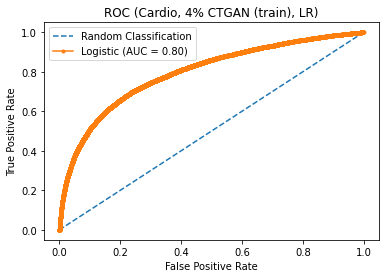

In [94]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4% CTGAN (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [95]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4% CTGAN (test), LR)')
# show the legend
pyplot.legend()
# show the plot

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.708


### SVM with CTGAN data

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83     27743
           1       0.85      0.79      0.82     27743

    accuracy                           0.82     55486
   macro avg       0.83      0.82      0.82     55486
weighted avg       0.83      0.82      0.82     55486



In [97]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      6936
           1       0.10      0.34      0.15       320

    accuracy                           0.83      7256
   macro avg       0.53      0.59      0.53      7256
weighted avg       0.93      0.83      0.87      7256



In [98]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4%, CTGAN, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.891


In [99]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4%, CTGAN, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.679


### XGBoost with CTGAN data

In [100]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [101]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.18086	validation_0-logloss:0.64389	validation_1-error:0.14829	validation_1-logloss:0.64658
[1]	validation_0-error:0.14058	validation_0-logloss:0.60272	validation_1-error:0.10488	validation_1-logloss:0.60751
[2]	validation_0-error:0.13290	validation_0-logloss:0.56481	validation_1-error:0.11081	validation_1-logloss:0.57123
[3]	validation_0-error:0.12733	validation_0-logloss:0.53694	validation_1-error:0.10763	validation_1-logloss:0.54508
[4]	validation_0-error:0.11260	validation_0-logloss:0.50229	validation_1-error:0.09468	validation_1-logloss:0.51283
[5]	validation_0-error:0.10823	validation_0-logloss:0.47685	validation_1-error:0.08930	validation_1-logloss:0.48845
[6]	validation_0-error:0.11482	validation_0-logloss:0.45820	validation_1-error:0.09882	validation_1-logloss:0.47079
[7]	validation_0-error:0.11370	validation_0-logloss:0.43946	validation_1-error:0.10226	validation_1-logloss:0.45398
[8]	validation_0-error:0.11358	validation_0-logloss:0.42168	validation_1

[71]	validation_0-error:0.05261	validation_0-logloss:0.16741	validation_1-error:0.07828	validation_1-logloss:0.22498
[72]	validation_0-error:0.05237	validation_0-logloss:0.16579	validation_1-error:0.07759	validation_1-logloss:0.22399
[73]	validation_0-error:0.05187	validation_0-logloss:0.16517	validation_1-error:0.07759	validation_1-logloss:0.22351
[74]	validation_0-error:0.05149	validation_0-logloss:0.16433	validation_1-error:0.07759	validation_1-logloss:0.22299
[75]	validation_0-error:0.05084	validation_0-logloss:0.16314	validation_1-error:0.07676	validation_1-logloss:0.22199
[76]	validation_0-error:0.05068	validation_0-logloss:0.16273	validation_1-error:0.07649	validation_1-logloss:0.22183
[77]	validation_0-error:0.05050	validation_0-logloss:0.16213	validation_1-error:0.07663	validation_1-logloss:0.22147
[78]	validation_0-error:0.05053	validation_0-logloss:0.16142	validation_1-error:0.07676	validation_1-logloss:0.22100
[79]	validation_0-error:0.05050	validation_0-logloss:0.16079	val

[141]	validation_0-error:0.04233	validation_0-logloss:0.13753	validation_1-error:0.06891	validation_1-logloss:0.20851
[142]	validation_0-error:0.04226	validation_0-logloss:0.13740	validation_1-error:0.06863	validation_1-logloss:0.20847
[143]	validation_0-error:0.04230	validation_0-logloss:0.13720	validation_1-error:0.06891	validation_1-logloss:0.20842
[144]	validation_0-error:0.04221	validation_0-logloss:0.13701	validation_1-error:0.06891	validation_1-logloss:0.20831
[145]	validation_0-error:0.04219	validation_0-logloss:0.13696	validation_1-error:0.06891	validation_1-logloss:0.20828
[146]	validation_0-error:0.04223	validation_0-logloss:0.13683	validation_1-error:0.06877	validation_1-logloss:0.20821
[147]	validation_0-error:0.04219	validation_0-logloss:0.13654	validation_1-error:0.06877	validation_1-logloss:0.20802
[148]	validation_0-error:0.04192	validation_0-logloss:0.13591	validation_1-error:0.06863	validation_1-logloss:0.20758
[149]	validation_0-error:0.04181	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     27743
           1       0.98      0.94      0.96     27743

    accuracy                           0.96     55486
   macro avg       0.96      0.96      0.96     55486
weighted avg       0.96      0.96      0.96     55486



In [103]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6936
           1       0.10      0.07      0.08       320

    accuracy                           0.93      7256
   macro avg       0.53      0.52      0.52      7256
weighted avg       0.92      0.93      0.93      7256



In [104]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 4% CTGAN (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.987


In [105]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 4% CTGAN (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.755
